In [40]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [41]:

# Importing the dataset
dataset = pd.read_csv('HealthData.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 13].values


#handling missing data

from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values='NaN',strategy='mean')
imputer=SimpleImputer().fit(X[:,11:13])
X[:,11:13]=imputer.transform(X[:,11:13])

In [42]:
#splitting dataset into training set and test set

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=0)

#feature scaling

from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

0    164
1    139
Name: num, dtype: int64

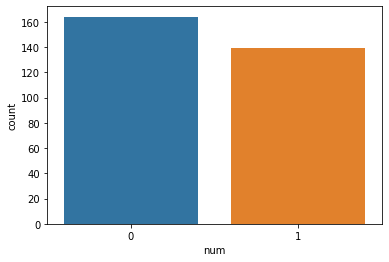

In [43]:
#EXPLORING THE DATASET
import seaborn as sn

sn.countplot(x='num',data=dataset)
dataset.num.value_counts()


SVM Score [0.7868852459016393, 0.7868852459016393, 0.8032786885245902, 0.7704918032786885]


Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

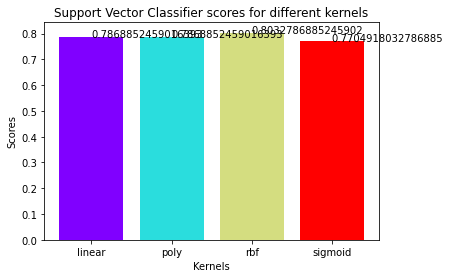

In [44]:
##checking for different kernels

from sklearn.svm import SVC
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, Y_train)
    svc_scores.append(svc_classifier.score(X_test, Y_test))

from matplotlib.cm import rainbow
# matplotlib inline
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
print("SVM Score",svc_scores);
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [45]:
# Fitting SVM to the Training set

classifier = SVC(kernel = 'rbf', random_state = 0 ,probability=True)
classifier.fit(X_train, Y_train)


SVC(probability=True, random_state=0)

In [46]:
# Predicting the Test set results

y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.8032786885245902

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        35
           1       0.85      0.65      0.74        26

    accuracy                           0.80        61
   macro avg       0.82      0.78      0.79        61
weighted avg       0.81      0.80      0.80        61



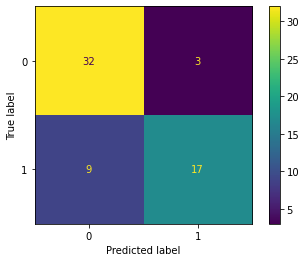

In [47]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, y_pred)
ConfusionMatrixDisplay.from_predictions(Y_test, y_pred)

#Interpretation:

from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

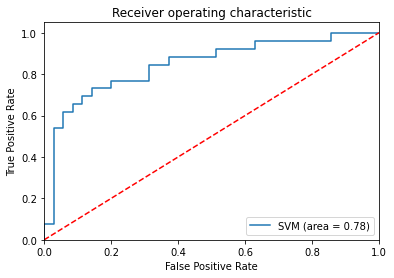

In [48]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()